
2b. Refolded folds
===================





In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer, RotationAnglePlotter
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
# logging.getLogger().setLevel(logging.INFO)

# load in the data from the provided examples
data, bb = load_laurent2016()
# bb[1,2] = 10000

data.head()

newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','feature_name','val'])
data = pd.concat([data,newdata],sort=False)
data.loc[np.logical_and(data['feature_name'] == 's2',np.isnan(data['nx'])),'feature_name'] ='s21'
data.loc[np.logical_and(data['feature_name'] == 's0',~np.isnan(data['val'])),'feature_name'] = 's01'

# data.loc[np.logical_and(data['feature_name'] == 's1',~np.isnan(data['val'])),'feature_name'] = 's11'

rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

Cannot import Surfe


In [2]:
images = []

Modelling S2
~~~~~~~~~~~~




Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
Not enough constraints for fold frame coordinate 1, 
Add some more and try again.
/home/lgrose/miniconda3/envs/loop4/lib/python3.7/site-packages/LoopStructural/visualisation/model_visualisation.py:295: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  spacing=step_vector)



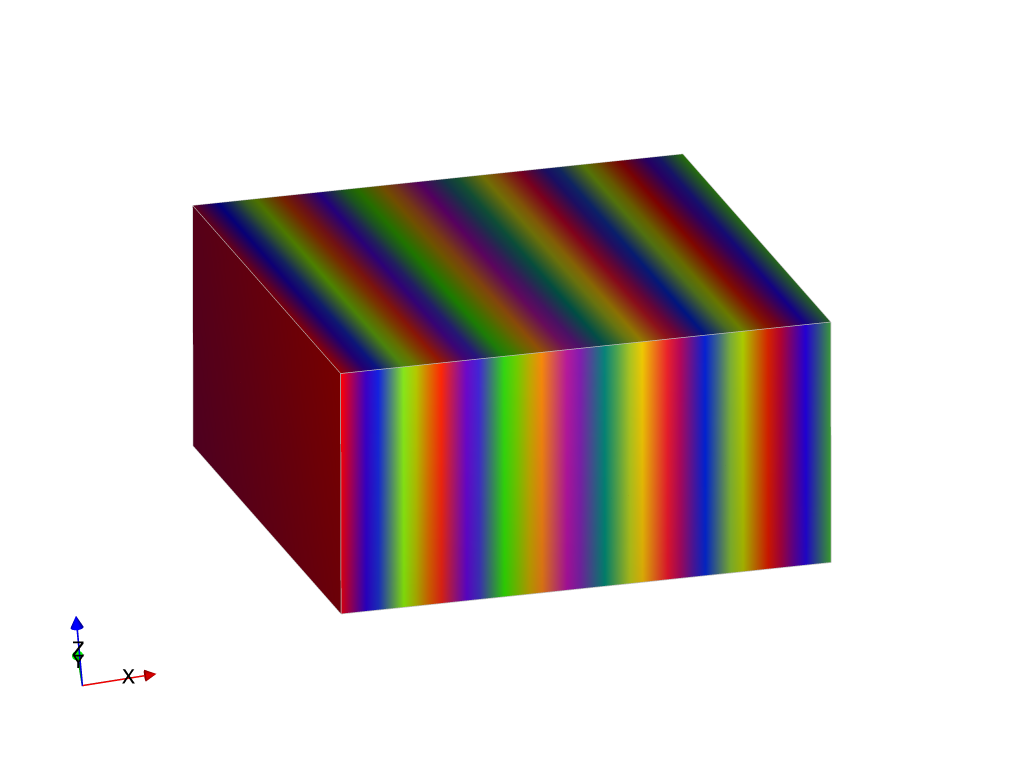

In [3]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=1e5, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2[0],
                       cmap='prism')
viewer.add_isosurface(s2[0],
                     slices=[0,1])
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.display()
images.append(viewer.image_array())


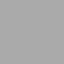

In [4]:
viewer = LavaVuModelViewer(model)
# viewer.add_scalar_field(s2[0],
#                        cmap='prism')
viewer.add_isosurface(s2[0],
                     nslices=10)
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.interactive()

Modelling S1
~~~~~~~~~~~~




In [5]:
s1 = model.create_and_add_folded_fold_frame('s1',
#                                             limb_wl=4, 
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.3,
                                            solver='lu'
                                           )





Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
Not enough constraints for fold frame coordinate 1, 
Add some more and try again.


/home/lgrose/miniconda3/envs/loop4/lib/python3.7/site-packages/LoopStructural/visualisation/model_visualisation.py:295: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  spacing=step_vector)



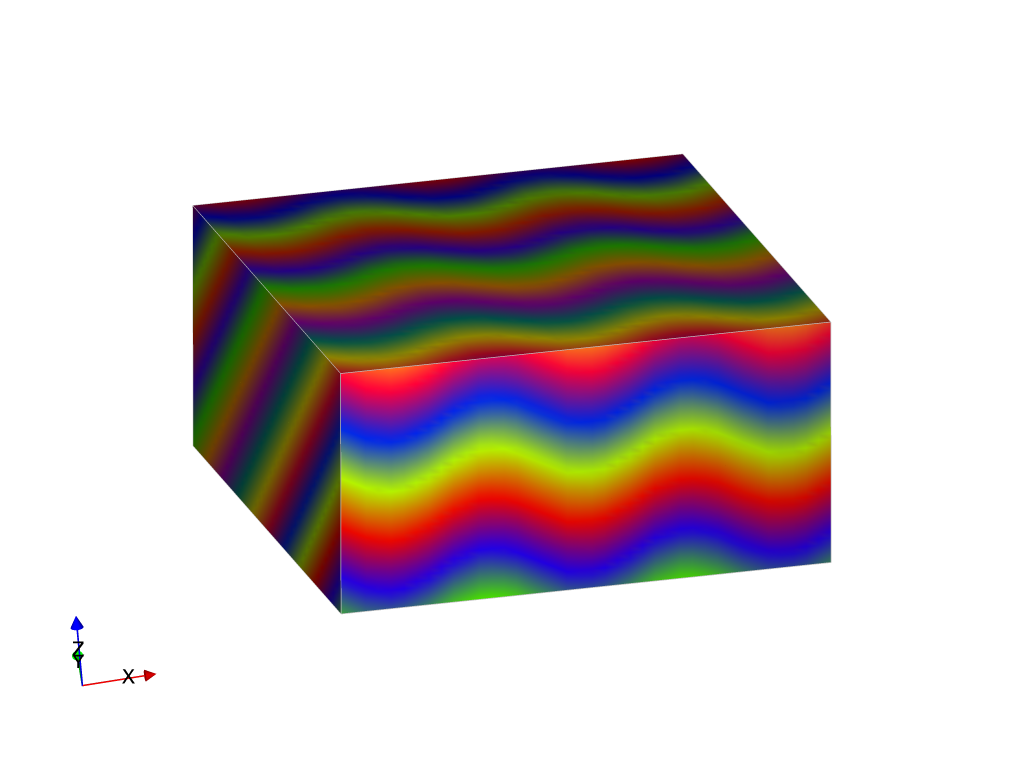

In [6]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1[0],
                       cmap='prism')
viewer.add_isosurface(s1[0],nslices=5)
# viewer.add_fold(s1.fold)
viewer.add_data(s1[0])
# viewer.add_points(s1[0].interpolator.support.nodes,'nodes')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()
images.append(viewer.image_array())

S2/S1 S-Plots 
~~~~~~~~~~~~~




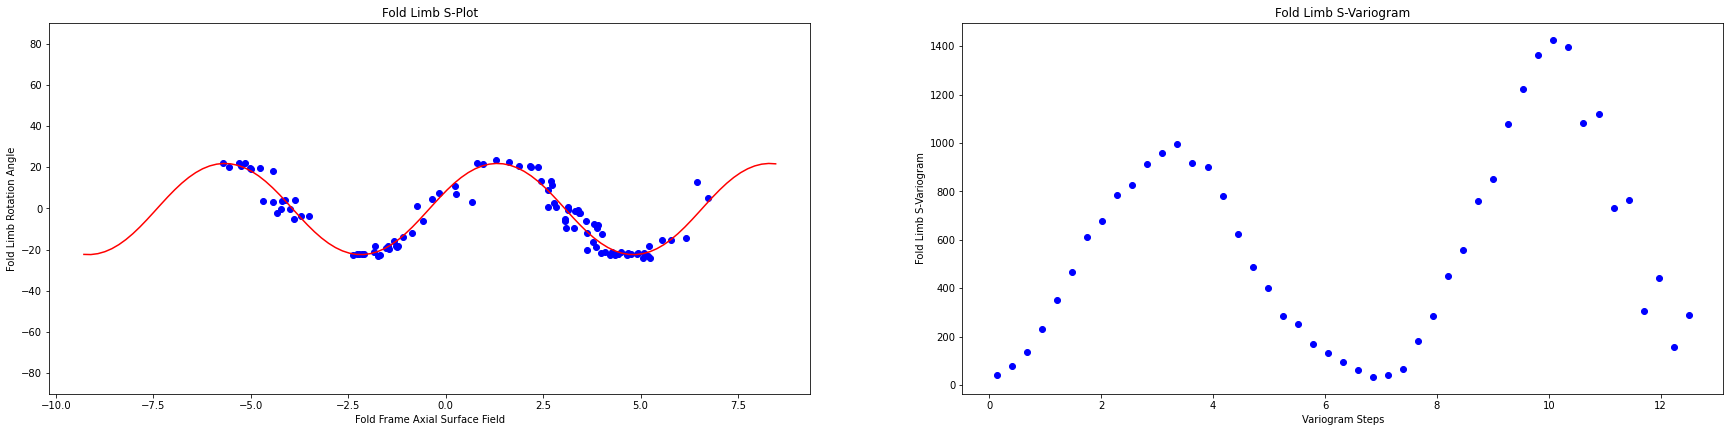

In [7]:
s1.fold.foldframe[0].set_model(model)
# s1.fold.foldframe[1].set_model(model)

s2_s1_splot = RotationAnglePlotter(s1)
s2_s1_splot.add_fold_limb_data()
s2_s1_splot.add_fold_limb_curve() 
s2_s1_splot.add_limb_svariogram()#fold_limb_
s2_s1_splot.default_titles()
s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][0])
s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][1])

# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s2[0].min(),s2[0].max(),1000)
# ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
# ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

Modelling S0
~~~~~~~~~~~~




In [22]:
s0 = model.create_and_add_folded_foliation('s0',
                                           fold_frame=s1,
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.2,
#                                             damp=True,
                                           solver='lu'
                                           )




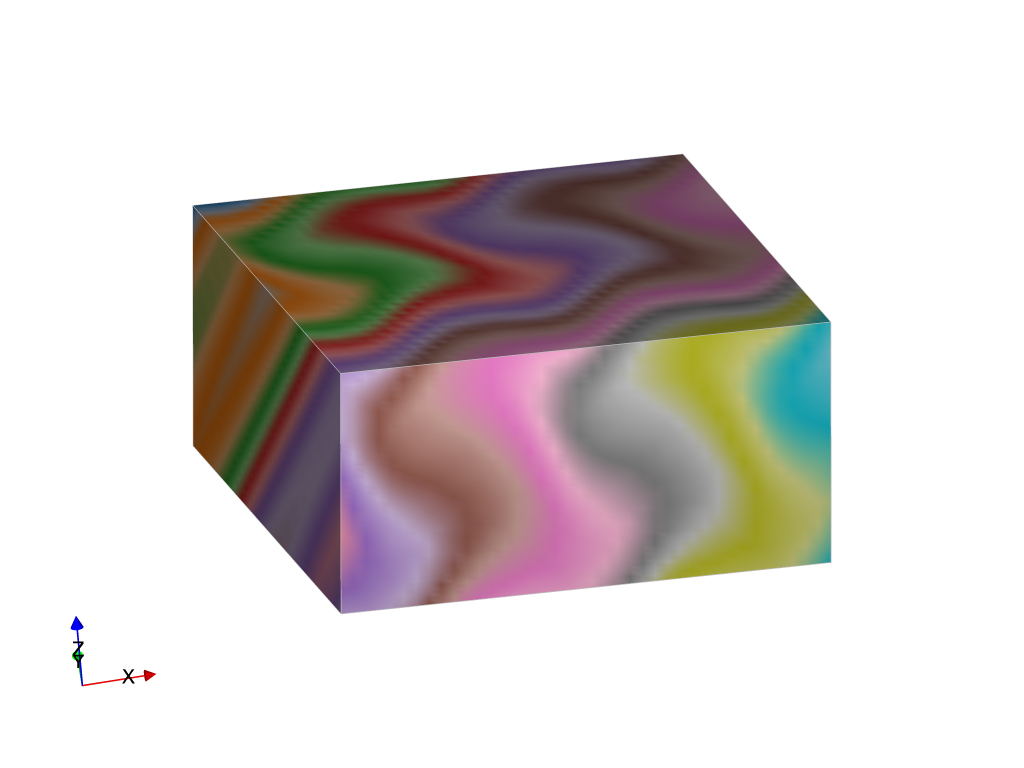

In [23]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0,
                       cmap='tab20')
# viewer.add_isosurface(s1[0],nslice=3)
viewer.add_data(s0,cmap='tab20')
# viewer.add_vector_field(s1[0],locations=model.regular_grid()[::10,:])#s0.interpolator.get_gradient_constraints()[:,:3])
# # viewer.add_vector_field(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])

# viewer.add_fold(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
# viewer.interactive()
viewer.display()
images.append(viewer.image_array())

Text(0.5, 1.0, 'C. S0 geological model')

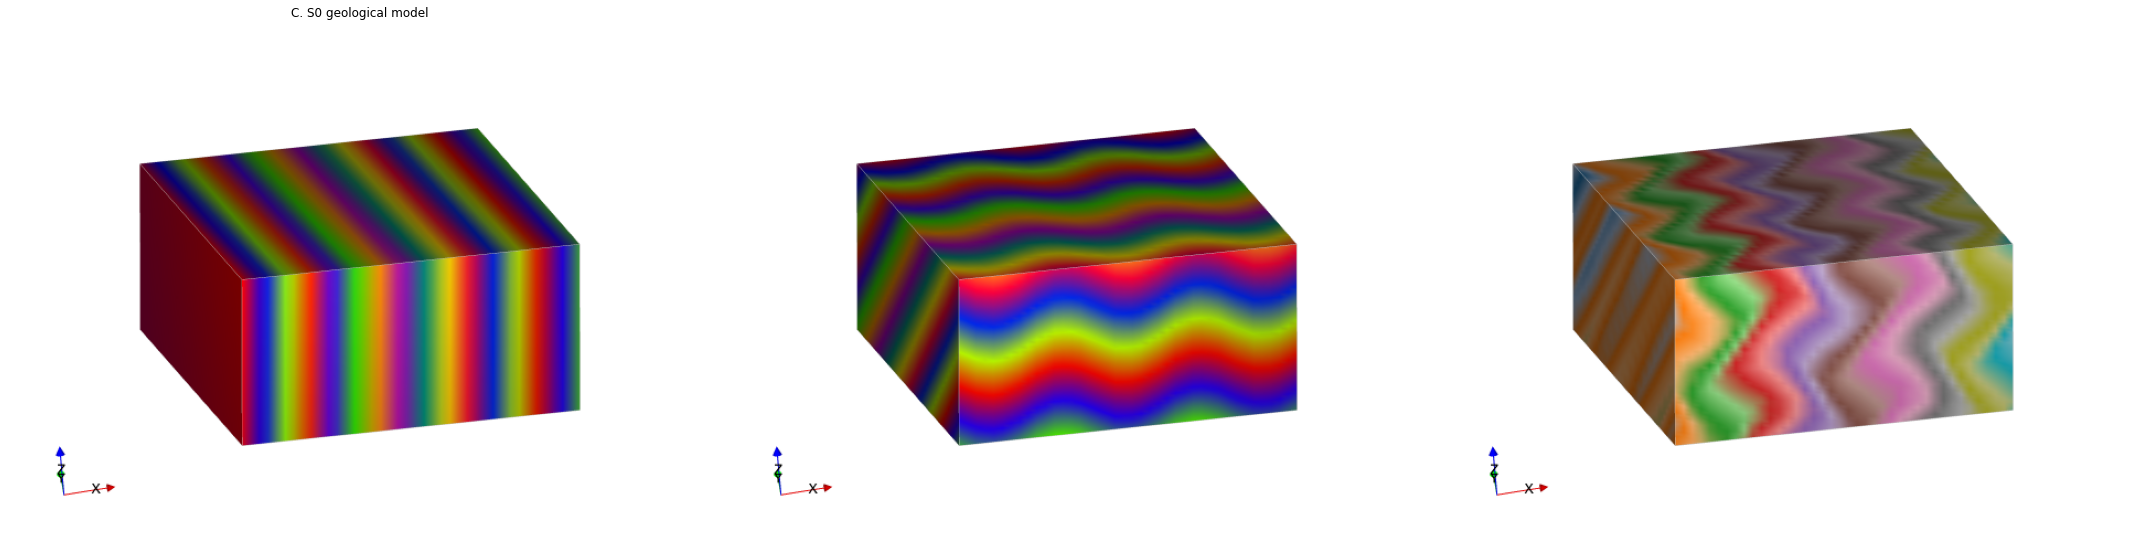

In [10]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[2])
for i in range(3):
    ax[i].axis('off')
plt.tight_layout()
ax[0].set_title('A. S2 Scalar field')
ax[0].set_title('B. S1 Scalar field')
ax[0].set_title('C. S0 geological model')

S1/S0 S-Plots 
~~~~~~~~~~~~~




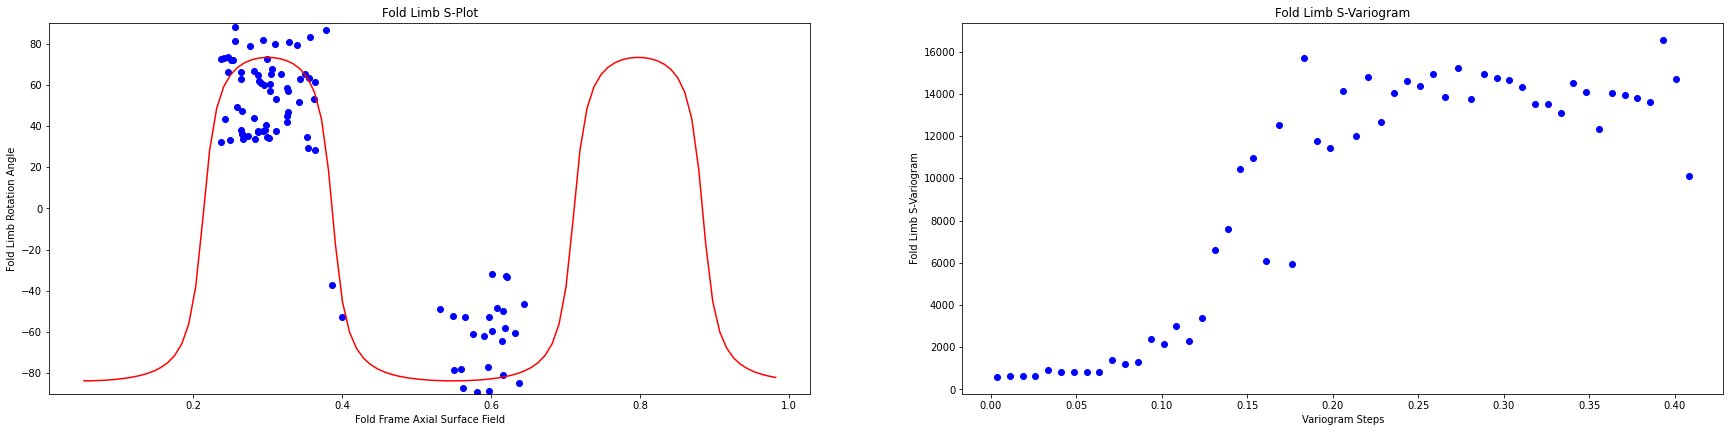

In [24]:
s0.fold.foldframe[0].set_model(model)
s1_s0_splot = RotationAnglePlotter(s0)
s1_s0_splot.add_fold_limb_data()
s1_s0_splot.add_fold_limb_curve()
s1_s0_splot.add_limb_svariogram()
s1_s0_splot.default_titles()
s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][0])
s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][1])

/home/lgrose/miniconda3/envs/loop4/lib/python3.7/site-packages/LoopStructural/visualisation/model_visualisation.py:295: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  spacing=step_vector)



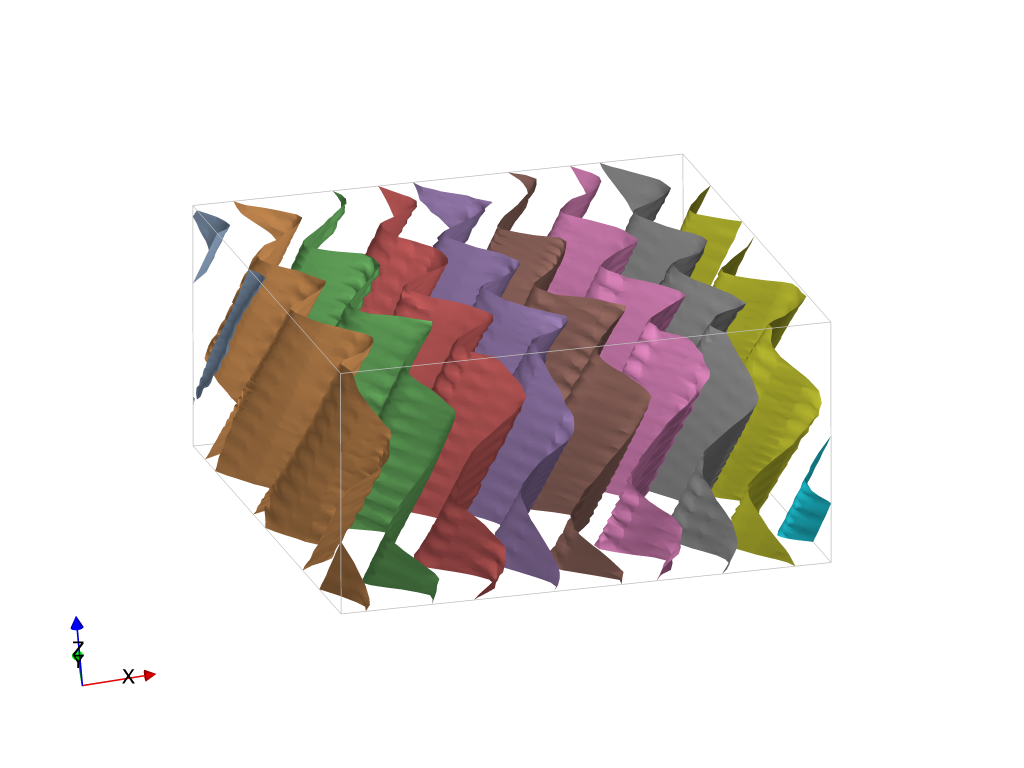

In [12]:


# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s1[0].min(),s1[0].max(),1000)
# ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
# ax[0].plot(s0['fold'].fold_limb_rotation.fold_frame_coordinate,s0['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0,nslices=10,paint_with=s0,cmap='tab20')
# viewer.add_data(s0)
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre()[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

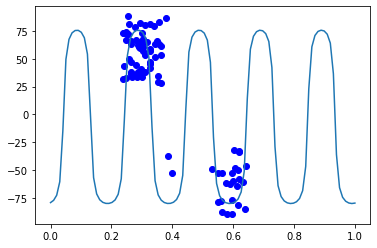

In [13]:
fra, s1v = s1.calculate_fold_limb_rotation(s0.builder)
plt.plot(s1v,fra,'bo')
plt.plot(np.linspace(0,1,100),s0.fold.fold_limb_rotation(np.linspace(0,1,100)))

In [14]:
pts = np.vstack([fra,s1v])
np.savetxt('notworking.txt',pts)

In [15]:
pts2 = np.loadtxt('working.txt')

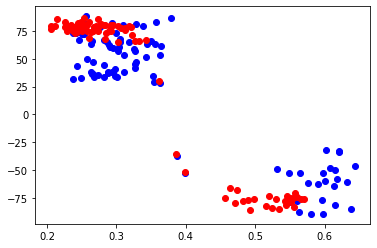

In [16]:
plt.plot(pts[1,:],pts[0,:],'bo')
plt.plot(pts2[1,:],pts2[0,:],'ro')


In [17]:
pts = s0.builder.get_norm_constraints()[:,:3]
grad = s1[0].evaluate_value(pts)

In [18]:
grad2 = np.loadtxt('s1.txt')

In [19]:
grad-grad2

array([0.03839977, 0.02599671, 0.01143741, 0.00866138, 0.00859616,
       0.0137574 , 0.01848085, 0.02913528, 0.02698621, 0.02167546,
       0.00186432, 0.00873192, 0.01972293, 0.00423549, 0.00224801,
       0.00350475, 0.00225431, 0.01810071, 0.01403045, 0.00189417,
       0.00280284, 0.03073449, 0.01425407, 0.00241588, 0.00317614,
       0.02148398, 0.02063848, 0.00558472, 0.00309133, 0.02330129,
       0.00166995, 0.00173741, 0.01276448, 0.03199763, 0.0516337 ,
       0.07543961, 0.07162746, 0.07178971, 0.07476364, 0.03249602,
       0.0098333 , 0.0494349 , 0.07155273, 0.07566877, 0.02896139,
       0.00269146, 0.00838304, 0.06448761, 0.06662307, 0.07697176,
       0.07958183, 0.05999323, 0.05565595, 0.03127425, 0.02350089,
       0.05323426, 0.04737442, 0.02446713, 0.02115913, 0.06358155,
       0.08217704, 0.02864355, 0.01280822, 0.001389  , 0.00091783,
       0.07478289, 0.07813147, 0.07085931, 0.04964068, 0.07303449,
       0.07451777, 0.06603847, 0.08036339, 0.05509118, 0.06183

Text(0.5, 1.0, 'C. S0 foliation orientation')

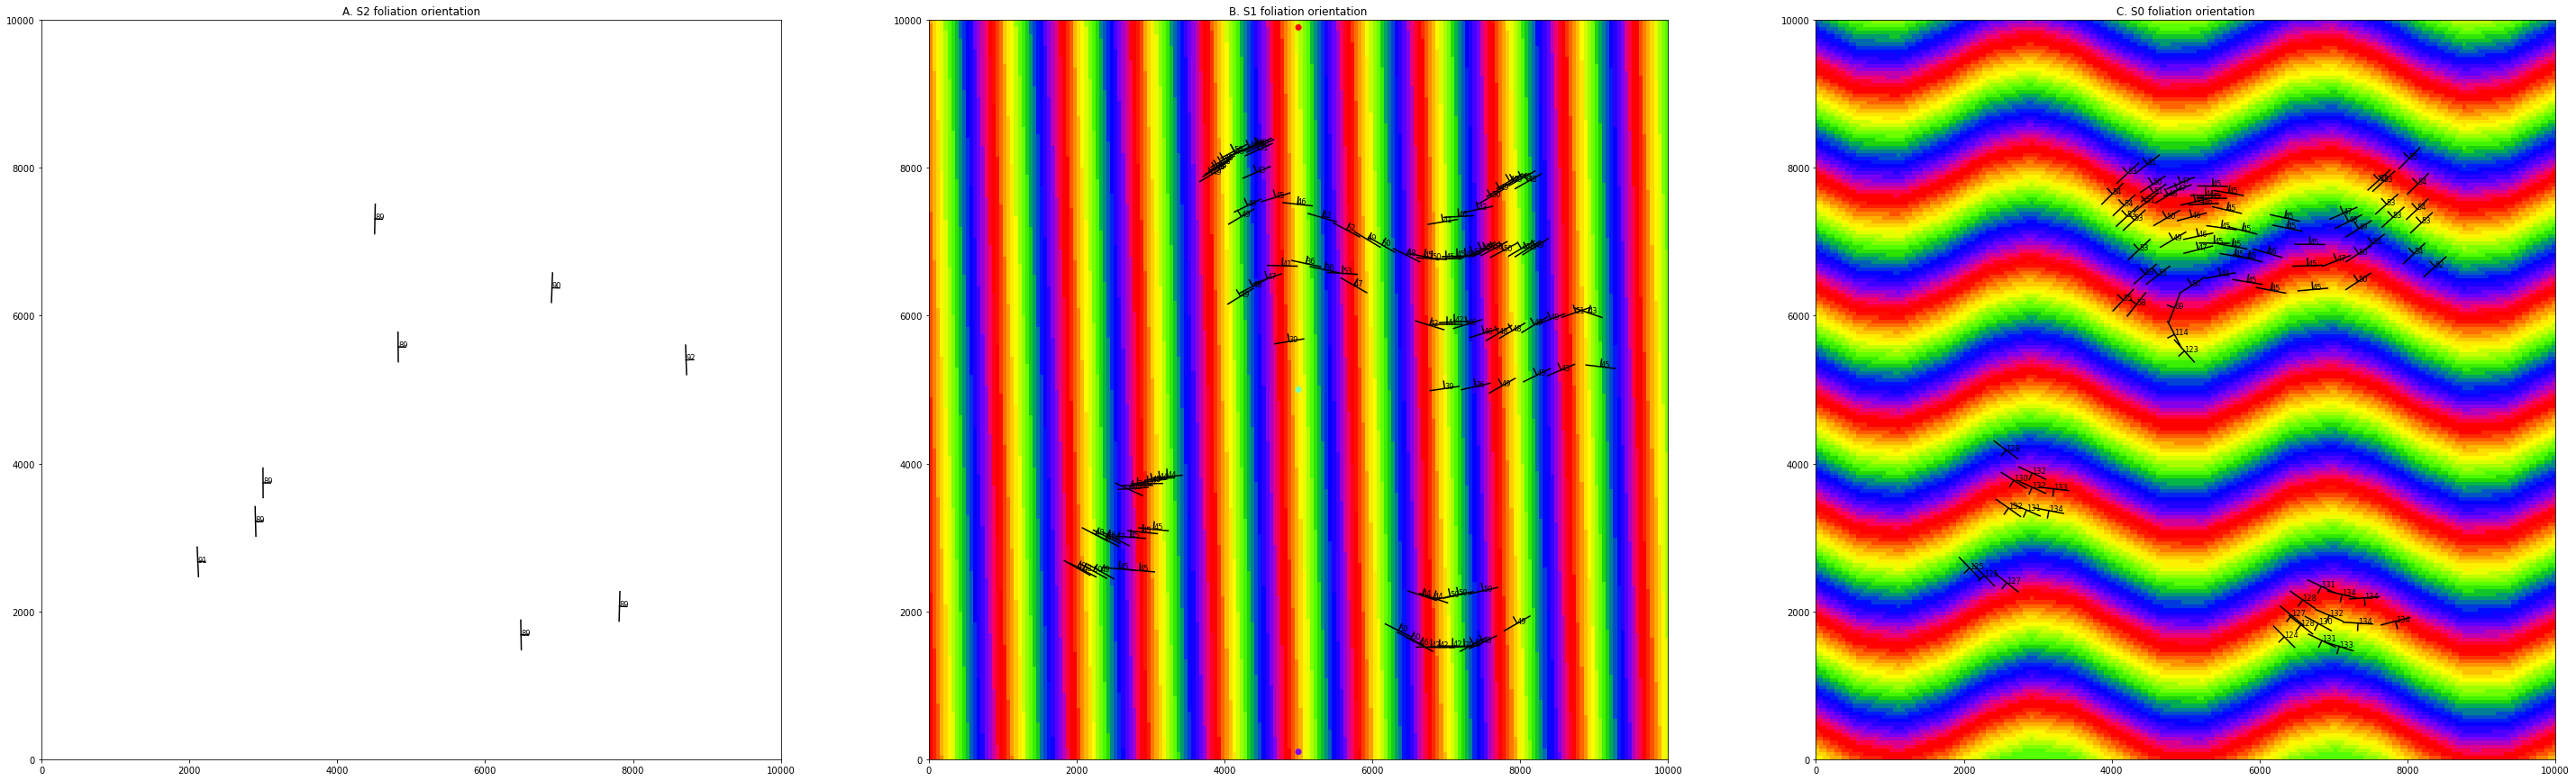

In [20]:
from LoopStructural.visualisation import MapView
fig, ax = plt.subplots(1,3,figsize=(50,60))
mapview1 = MapView(model,ax=ax[0])
mapview1.add_data(s2[0],symb_scale=200,symb_colour='black')
mapview2 = MapView(model,ax=ax[1])
mapview2.nsteps=(200,200)
mapview2.add_scalar_field(s2[0],cmap='prism')
mapview2.add_data(s1[0],symb_scale=200,symb_colour='black')
mapview1 = MapView(model,ax=ax[2])
mapview1.nsteps=(200,200)

mapview1.add_scalar_field(s1[0],cmap='prism')

mapview1.add_data(s0,symb_scale=200,symb_colour='black')
ax[0].set_title('A. S2 foliation orientation')
ax[1].set_title('B. S1 foliation orientation')
ax[2].set_title('C. S0 foliation orientation')


ValueError: 'c' argument has 89 elements, which is inconsistent with 'x' and 'y' with size 0.

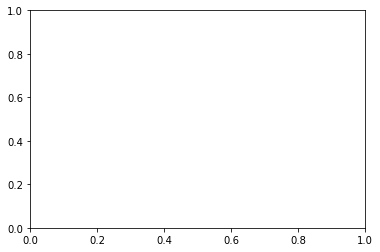

In [21]:
# from LoopStructural.visualisation import MapView
# mapview = MapView(model)
# mapview.nsteps = (100,100)

# mapview.add_contour(s1[0],10)
# # mapview.add_data(s0)
# plt.quiver(pts[:,0],pts[:,1],grad[:,0],grad[:,1])
# plt.scatter(s0['feature'].builder.get_norm_constraints()[:,0],s0['feature'].builder.get_norm_constraints()[:,1],c=np.linalg.norm(s1_grad,axis=1))
plt.scatter(s0['feature'].builder.get_gradient_constraints()[:,0],s0['feature'].builder.get_gradient_constraints()[:,1],c=fra,s=50,alpha=0.5)

In [ ]:
# from LoopStructural.visualisation import MapView
# mapview = MapView(model)
# mapview.nsteps = (100,100)


# mapview.add_contour(s1[0],10)
# mapview.add_data(s0)
# plt.quiver(pts[:,0],pts[:,1],grad[:,0],grad[:,1])
# plt.scatter(s0.builder.get_norm_constraints()[:,0],s0.builder.get_norm_constraints()[:,1],c=np.linalg.norm(s1_grad,axis=1))
plt.scatter(s0['feature'].builder.get_gradient_constraints()[:,0],s0['feature'].builder.get_gradient_constraints()[:,1],c=np.rad2deg(np.arcsin(np.sum(s1_grad*s0_g[:,3:],axis=1))),s=50,alpha=0.5)

In [ ]:
plt.scatter(np.linalg.norm(s1_gradu,axis=1),np.rad2deg(np.arcsin(np.sum(s1_grad*s0_g[:,3:],axis=1))),c=s1v)

In [ ]:
s0_g = s0['feature'].builder.get_norm_constraints()[:,:6]
s1_grad = s1['feature'][0].evaluate_gradient(s0_g[:,:3])
s1_gradu = s1['feature'][0].evaluate_gradient(s0_g[:,:3])

s1_grad /= np.linalg.norm(s1_grad,axis=1)[:,None]
s1v = s1['feature'][0].evaluate_value(s0_g[:,:3])

In [ ]:
plt.plot(s1v,np.rad2deg(np.arcsin(np.sum(s1_grad*s0_g[:,3:],axis=1))),'bo')

In [ ]:
fra.shape

In [ ]:
s1[0]

In [ ]:
points  =s0['feature'].builder.interpolator.get_gradient_constraints()
s0g = points[:,3:6]
# s0g/=np.linalg.norm(s0g,axis=1)[:,None]
# calculate the gradient and value of the first coordinate of the
# fold frame
# for the locations and normalise
s1g = s1['feature'][0].evaluate_gradient(points[:, :3])
# s1g /= np.linalg.norm(s1g, axis=1)[:, None]
s1v = s1['feature'][0].evaluate_value(points[:, :3])

In [ ]:
far = np.sum(s1g*s0g,axis=1)

In [ ]:
plt.plot(s1v,far,'bo')

In [ ]:
plt.plot(s1v,far,'bo')

In [ ]:
np.linalg.norm(s1g, axis=1)[:, None]